In [1]:
%cd Measurement-automation/

%pylab inline

/home/gleb/Документы/Science/Статьи/Machine vision/Measurement-automation
Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.patches as patches
from matplotlib import ticker, colorbar as clb

%cd .. 
from parula import *
%cd Measurement-automation/

from importlib import reload
from resonator_tools.circuit import notch_port

import scipy
from scipy.signal import correlate, find_peaks
from scipy.optimize import *

rc("font", **{"size":14})

mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 0.5

%load_ext snakeviz

import lib2

from lib2.MeasurementResult import *

/home/gleb/Документы/Science/Статьи/Machine vision
/home/gleb/Документы/Science/Статьи/Machine vision/Measurement-automation


In [3]:
anti = MeasurementResult.load("Xmon BMSTU 1806-176-1", "I-anticrossing")
data_dict = anti.get_data()
data_dict["data"] = data_dict["data"]+\
        2e-2*(random.normal(size = data_dict["data"].shape)\
                        +1j*random.normal(size = data_dict["data"].shape))
    
# data_dict["data"] = (savgol_filter(real(S21s), 21, 2)\
#                                 + 1j*savgol_filter(imag(S21s), 21, 2))
# data_dict["data"] = S21s*exp(2j*pi*65e-9*freqs)
# anti.set_data(data_dict)


0 data/Xmon BMSTU 1806-176-1/Jul 05 2018/16-49-06 - I-anticrossing/I-anticrossing.pkl
1 data/Xmon BMSTU 1806-176-1/Jul 07 2018/08-13-54 - I-anticrossing/I-anticrossing.pkl
2 data/Xmon BMSTU 1806-176-1/Jul 12 2018/12-24-08 - I-anticrossing/I-anticrossing.pkl
3 data/Xmon BMSTU 1806-176-1/Jul 13 2018/00-35-05 - I-anticrossing/I-anticrossing.pkl
More than one file found. Enter an index from listed above:
1


TabError: inconsistent use of tabs and spaces in indentation (KeysightAWG.py, line 99)

In [4]:
# (np.max(abs(S21s))-np.min(abs(S21s)))/2

In [51]:
anti = MeasurementResult.load("Xmon-043-3", "VI-anticrossing_fit-fail")
data_dict = anti.get_data()
# data_dict["data"] = data_dict["data"]*exp(2j*pi*65e-9*freqs) +\
#         1e-2*(random.normal(size = data_dict["data"].shape)\
#                         +1j*random.normal(size = data_dict["data"].shape))
# # data_dict["data"] = S21s*exp(2j*pi*65e-9*freqs)

# anti.set_data(data_dict)

In [5]:
anti = MeasurementResult.load("BMSTU Clean 3", "I-anticrossing")
data_dict = anti.get_data()
# data_dict["data"] = data_dict["data"]*exp(2j*pi*65e-9*freqs) +\
#         1e-2*(random.normal(size = data_dict["data"].shape)\
#                         +1j*random.normal(size = data_dict["data"].shape))
# # data_dict["data"] = S21s*exp(2j*pi*65e-9*freqs)

# anti.set_data(data_dict)

In [6]:
currents, S21s, freqs = anti.get_data().values()

In [9]:
# reload(lib2.ResonatorDetector)
# reload(lib2.fulaut.AnticrossingOracle)
from lib2.fulaut.AnticrossingOracle import AnticrossingOracle

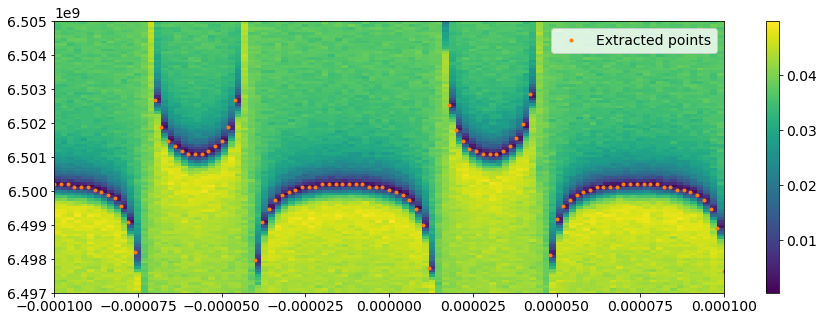

In [11]:
ao = AnticrossingOracle("transmon", anti, plot=True, fast_res_detect=False, hints=[])
plt.colorbar()

6.5007e+09, 3.5919e+07, 8.7762e-05, -1.4067e-05, 8.9727e+09, 8.8335e-02 loss: 0.03 MHz


(array([ 6.50071690e+09,  3.59193870e+07,  8.77623592e-05, -1.40674438e-05,
         8.97273272e+09,  8.83350315e-02]), 0.031017437716106256)

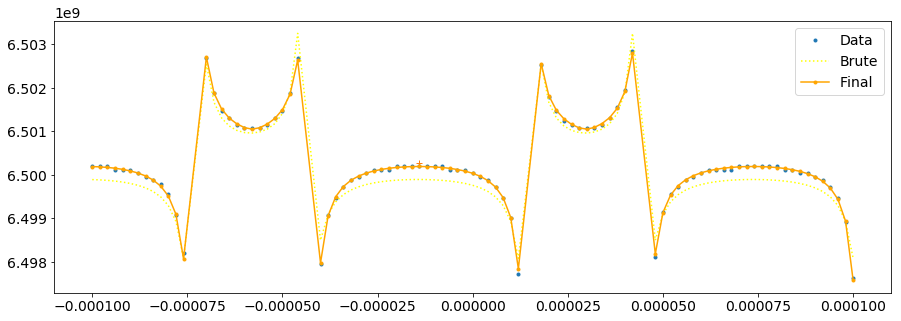

In [12]:
result = ao.launch()
result

In [124]:
ao._brute_opt_params, ao._brute_loss

([7003049488.940596,
  40000000.0,
  8.599999999999999e-05,
  7.020408163265299e-06,
  5600000000.0,
  0.8],
 0.05306427036131921)

In [97]:
params

array([7.00420000e+09, 1.18588054e+08, 3.00000000e+07, 7.66425672e-06,
       1.20000000e+10, 1.00000000e+00])

In [93]:
sqrt(ao._brute_cost_function((7.0042e9, 40e6, 9e9, 0.5), ao._res_points[:,0], 
                            ao._res_points[:,1], ao._period, 7.02e-6)/len(ao._res_points))/1e6

1.3610952633703126

In [792]:
sqrt(ao._cost_function((6500729139.784946, 36000000.0, 8.7e-05, -1.3894736842105268e-05, 8970000000.0, 0.08), ao._res_points[:,0], 
                            ao._res_points[:,1])/len(ao._res_points))/1e6

12.7051091861833

In [542]:
sqrt(ao._cost_function(ao._opt_params, ao._res_points[:,0], 
                            ao._res_points[:,1])/len(ao._res_points))/1e6

0.023995400040963955

In [451]:
ao._opt_params

array([ 6.50072428e+09,  3.60620356e+07,  8.77823464e-05, -1.40943233e-05,
        8.97440861e+09,  7.88258030e-02])

In [572]:
result

array([ 6.50065327e+09,  3.09938416e+07,  8.77805345e-05, -1.41241462e-05,
        8.54073664e+09,  2.99126138e-01])

/home/gleb/py36/lib/python3.6/site-packages/matplotlib/backends/backend_pdf.py:1201: UserWarning: 'STIX-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  warnings.warn(msg % os.path.basename(filename))


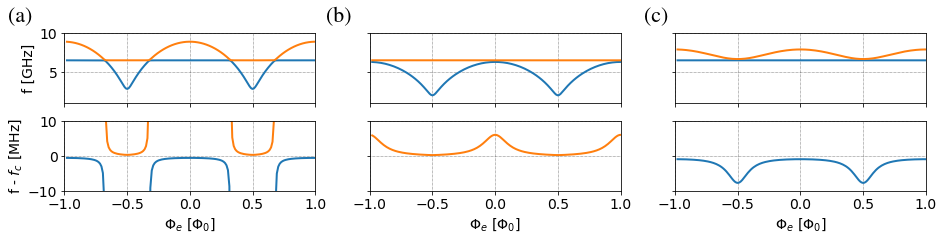

In [760]:
max_freqs = [8.9e9, 6.3e9, 7.9e9]
ds = [0.1, 0.1, 0.71]

letters = ["a", "b", "c"]

for i in range(0, 3):
    
    currents_fine = linspace(ao._curs[0], ao._curs[-1], 200)
    levels = ao._eigenlevels(ao._qubit_spectrum(currents_fine, *(list(result[2:4])+[max_freqs[i], ds[i]])), *result[:2])


    plt.subplot2grid((2,3),(0,i))

    res_freqs = ao._model_fast(ao._res_points[:,0], result);
    plt.plot((currents_fine - result[3])/result[2], levels[1]/1e9, label="$E_{-,1}$", linewidth=2)
    plt.plot((currents_fine - result[3])/result[2], levels[2]/1e9, label = "$E_{+,1}$", linewidth=2)

    plt.grid()
    if i==0:
        plt.ylabel("f [GHz]")
    else:
        plt.gca().set_yticklabels([])

        
    plt.xlim(-1,1)
    plt.gca().set_xticklabels([])
    plt.ylim(1, 10)
    # plt.legend()
    # rect = patches.Rectangle((-.99,6.405),1.98,0.2,linewidth=2,edgecolor='r',facecolor='none')
    # plt.gca().add_patch(rect)
    plt.text(-1.45+i/10, 11.5, "(%s)"%letters[i], fontdict={"name":"STIX"}, fontsize=22, color="black")

    loc = ticker.MultipleLocator(base=.5) # this locator puts ticks at regular intervals
    gca().xaxis.set_major_locator(loc)

    plt.subplot2grid((2,3),(1,i))

    plt.plot((currents_fine - result[3])/result[2], levels[1]/1e6-result[0]/1e6, label="$E_{-,1}$", linewidth=2)
    plt.plot((currents_fine - result[3])/result[2], levels[2]/1e6-result[0]/1e6, label = "$E_{+,1}$", linewidth=2)
    plt.xlim(-1,1)
    
    plt.ylim(-10,10)
    if i==0:
        plt.ylabel("f - $f_c$ [MHz]")
    else:
        plt.gca().set_yticklabels([])
    plt.grid()
    plt.xlabel("$\Phi_e$ [$\Phi_0$]")

    loc = ticker.MultipleLocator(base=.5) # this locator puts ticks at regular intervals
    gca().xaxis.set_major_locator(loc)

plt.tight_layout(w_pad=-.5)


plt.gcf().set_size_inches(15.5,3)
plt.savefig("../Pictures/anti_theor.pdf", bbox_inches="tight", dpi=600)


Text(1.075,-1.25,'$|S_{21}|$')

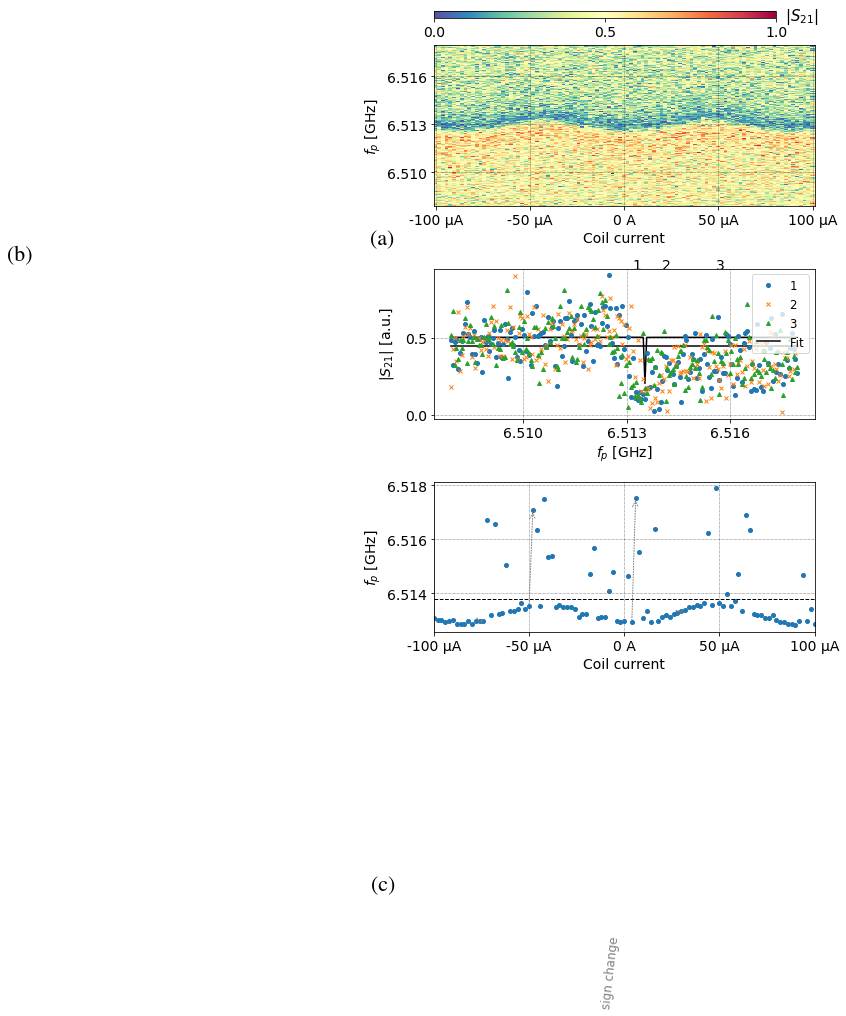

In [865]:
# # mega subplot
currents, data, freqs = anti.get_data().values()

plt.subplot2grid((100, 1), (0, 0), rowspan=40)

dx = currents[1]-currents[0]


x = concatenate((currents-dx/2, [currents[-1]+dx/2]))
plt.pcolormesh((x), freqs/1e9, abs(data).T/np.max(abs(data)), cmap="Spectral_r", rasterized=True, vmin=0)
plt.grid()
plt.ylabel("$f_p$ [GHz]")
plt.xlabel("Coil current")
# plt.xlim(-1,1)
# plt.gcf().set_size_inches(7.5,3)
rect = patches.Rectangle((-0.5025*result[2]+result[3],6.498),0.005*result[2],0.006,linewidth=1,
                             edgecolor='black',facecolor='black')
plt.gca().add_patch(rect)
plt.text(-0.49*result[2]+result[3], 6.504, "1", color="black")

rect = patches.Rectangle((-0.3325*result[2]+result[3],6.498),0.005*result[2],0.006,linewidth=1,
                             edgecolor='black',facecolor='black')
plt.gca().add_patch(rect)
plt.text(-0.315*result[2]+result[3], 6.504, "2", color="black")

rect = patches.Rectangle((-0.0025*result[2]+result[3],6.498),0.005*result[2],0.006,linewidth=1,
                             edgecolor='black',facecolor='black')
plt.gca().add_patch(rect)
plt.text(0.01*result[2]+result[3], 6.504, "3", color="black")
loc = ticker.MultipleLocator(base=5e-5) # this locator puts ticks at regular intervals
gca().xaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=3e-3) # this locator puts ticks at regular intervals
gca().yaxis.set_major_locator(loc)
plt.text(-135e-6, 6.5055, "(a)", fontdict={"name":"STIX"}, fontsize=22)
plt.gca().xaxis.set_major_formatter(ticker.EngFormatter("A"))
ax_1 = gca()
#############################################################
plt.subplot2grid((100, 1), (40, 0), rowspan=30)

plt.plot(freqs/1e9, abs(data)[22]/np.max(abs(data)), marker="o", linestyle="", label="1", markersize=4)
notp = notch_port(freqs, (data)[22])
notp.autofit()
plt.plot(freqs/1e9, abs(notp.z_data_sim)/np.max(abs(data)), "black", zorder=0)

plt.plot(freqs/1e9, abs(data)[29]/np.max(abs(data)), marker="x", linestyle="", label="2", markersize=4)

plt.plot(freqs/1e9, abs(data)[43]/np.max(abs(data)), marker="^", linestyle="", label="3", markersize=4)
notp = notch_port(freqs, (data)[43])
notp.autofit()
plt.plot(freqs/1e9, abs(notp.z_data_sim)/np.max(abs(data)), "black", label="Fit", zorder=0)

plt.ylabel("$|S_{21}|$ [a.u.]")
plt.xlabel("$f_p$ [GHz]")
plt.legend(fontsize="small")
plt.grid()
plt.gca().yaxis.set_label_coords(-0.1,0.5)

plt.text(6.4951, 1, "(b)", fontdict={"name":"STIX"}, fontsize=22)

loc = ticker.MultipleLocator(base=.003) # this locator puts ticks at regular intervals
gca().xaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=.5) # this locator puts ticks at regular intervals
gca().yaxis.set_major_locator(loc)

#############################################################
plt.subplot2grid((100, 1), (70, 0), rowspan=30)

x = (ao._res_points[:,0])#/result[2]
plot(x, ao._res_points[:,1]/1e9, color = "C0", marker="o", linestyle="", label="Extracted", markersize=4);
points = list(zip(x, ao._res_points[:,1]/1e9))

plot(x, ones_like(ao._res_points[:,1])*mean(ao._res_points[:,1])/1e9, "black", 
                                         linestyle="--", label="Mean", linewidth=1);
# plt.legend(fontsize="small")
# plt.xlim(-1,1)
plt.ylabel("$f_p$ [GHz]")
# plt.grid()
loc = ticker.MultipleLocator(base=.002) # this locator puts ticks at regular intervals
gca().yaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(base=5e-5) # this locator puts ticks at regular intervals
gca().xaxis.set_major_locator(loc)


plt.grid()
plt.xlabel("Coil current")
plt.annotate("", xy=points[13], xytext=points[12],
                arrowprops=dict(arrowstyle="->", linestyle=":", color="grey"))
plt.text(-.68*result[2]+result[3], 6.501, "sign change", rotation=83.5, 
             fontdict={"size":12, "color":"grey"})

plt.annotate("", xy=points[26], xytext=points[25],
                arrowprops=dict(arrowstyle="->", linestyle=":", color="grey"))
plt.annotate("", xy=points[53], xytext=points[52],
                arrowprops=dict(arrowstyle="->", linestyle=":", color="grey"))

plt.annotate("", xy=points[66], xytext=points[65],
                arrowprops=dict(arrowstyle="->", linestyle=":", color="grey"))
plt.text(-133e-6, 6.503, "(c)", fontdict={"name":"STIX"}, fontsize=22)
plt.gca().xaxis.set_major_formatter(ticker.EngFormatter("A"))


plt.gcf().set_size_inches(7,10)
tight_layout()
# plt.subplots_adjust(top=1)
plt.xlim(-100e-6, 100e-6)
caxes = clb.make_axes(ax_1, location="top", shrink=0.9, aspect=50, pad=0.125, anchor=(0,0))[0]
# plt.colorbar(cax = caxes)
cb = plt.colorbar(orientation="horizontal", cax=caxes)
loc = ticker.MultipleLocator(base=0.5) # this locator puts ticks at regular intervals
cb.locator = loc
cb.update_ticks()
cb.ax.set_title("$|S_{21}|$", position=(1.075,-1.25), fontsize=15)
# plt.savefig("../Pictures/anti_subplots.pdf", bbox_inches="tight", dpi=600)

In [27]:
def _model_square(duty, phase, x):
        return scipy.signal.square(2*pi*x/ao._period-phase, duty)

def _cost_function_sweet_spots(p, x, y):
    duty, phase = p
    fit_data = _model_square(duty, phase, x)
    return -sum(fit_data*y)

def _find_potential_sweet_spots(self):
    data = self._res_points[:,1]-mean(self._res_points[:,1])
    duty, phase = brute(_cost_function_sweet_spots,
                        ((0, 1), (-pi, pi)),
                        Ns = 100,
                        args=(ao._res_points[:,0], data),
                        full_output=0)
    self._duty, self._phase = duty, phase
    sws1 = phase/2/pi*self._period + self._period*duty/2
    sws2 = phase/2/pi*self._period - self._period*(1-duty)/2
    return 

In [28]:
data_no_mean = ao._res_points[:,1]-mean(ao._res_points[:,1])

duty, phase = brute(_cost_function_sweet_spots,
                        ((0, 1), (-pi, pi)),
                        Ns = 50,
                        args=(ao._res_points[:,0], data_no_mean),
                        full_output=0)
(XX, YY), loss = brute(_cost_function_sweet_spots,
                        ((0, 1), (-pi, pi)),
                        Ns = 50,
                        args=(ao._res_points[:,0], data_no_mean),
                        full_output=1)[2:]

In [100]:
len(data)

101

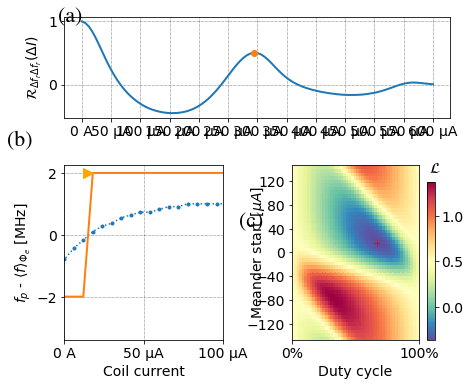

In [29]:
plt.subplot2grid((5, 2), (0, 0), rowspan=2, colspan=2)

extracted_no_mean = ao._res_points[:,1]-mean(ao._res_points[:,1])
extracted_zero_padded = scipy.zeros(len(ao._curs))
extracted_zero_padded[ao._extracted_indices] = extracted_no_mean
data = extracted_zero_padded

acorr = correlate(data, data, "full")[data.size-1:]
acorr = acorr/acorr[0]
delta_is = linspace(0, ao._curs[-1]-ao._curs[0], len(ao._curs))
plot(delta_is, acorr, linewidth = 2)

# plt.xlim(-1e-6,201e-6)
plt.gca().xaxis.set_major_formatter(ticker.EngFormatter("A"))
loc = ticker.MultipleLocator(base=50e-6) # this locator puts ticks at regular intervals
gca().xaxis.set_major_locator(loc)
plt.ylabel(r'$\mathcal{R}_{\Delta f_r \Delta f_r} (\Delta I)$')
# plt.xlabel(r"$\Delta\, I$")

peaks = find_peaks(acorr, height=0.5)[0]
plot(delta_is[peaks], acorr[peaks], "o")

plt.text(-40e-6, 1, "(a)", fontdict={"name":"STIX"}, fontsize=22)
plt.grid()

###############################

plt.subplot2grid((5, 2), (2, 0), rowspan=3, colspan=1)

x = (ao._res_points[:,0])


plot(ao._curs, data/1e6, ".", linestyle=":");
plot(ao._curs, 2*_model_square(duty, phase, ao._curs), "-", linewidth=2)
plot((phase/2/pi*ao._period + ao._period*duty/2), 0, '|', markersize=100, color="black")
plot((phase/2/pi*ao._period + ao._period*(1+duty)/2), 0, '|', markersize=100, color="black")
plot(phase/2/pi*ao._period, 2, marker = ">", color="orange", markersize=10)


plt.xlim(0e-6, 100e-6)
plt.xlabel("Coil current")
plt.gca().xaxis.set_major_formatter(ticker.EngFormatter("A"))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=50e-6))

plt.ylabel(r"$f_p$ - $\langle f \rangle_{\Phi_e}$ [MHz]")
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=2))

plt.text(-36e-6, 2.87, "(b)", fontdict={"name":"STIX"}, fontsize=22)

plt.grid()


###########################

plt.subplot2grid((5, 2), (2, 1), rowspan=3, colspan=1)

plt.pcolormesh(XX, YY/2/pi*ao._period/1e-6, (loss/1e7+6)/12, cmap="Spectral_r", rasterized=True)
plot(duty, phase/2/pi*ao._period/1e-6, '+', color="red")

plt.xlabel("Duty cycle")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.gca().xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

plt.ylabel("Meander start [$\mu A$]")
plt.gca().yaxis.set_label_coords(-0.2,0.5)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=40))

plt.text(-.42, 43, "(c)", fontdict={"name":"STIX"}, fontsize=22)


tight_layout(h_pad = .5, w_pad=-1)

cb = plt.colorbar(shrink=0.9, use_gridspec = False, anchor=(0,0))
cb.ax.set_title("$\mathcal{L}$", position=(1,1.025), fontsize=15)

loc = ticker.MultipleLocator(base=0.5) # this locator puts ticks at regular intervals
cb.locator = loc
cb.update_ticks()


plt.gcf().set_size_inches(7, 6)
# plt.savefig("../Pictures/per+phase.pdf", bbox_inches="tight", dpi=600)

In [108]:
params = result[0].copy()
params[0] = 7.0042e9
params[1] = 30e6


ds = linspace(0,1, 200)
freqs = linspace(1e9, 20e9, 200)

L = []
for d in ds:
    params[-1] = d
    row = []
    for freq in freqs:
        params[-2] = freq
        row.append(ao._cost_function(params, ao._res_points[:,0], ao._res_points[:,1]))
    L.append(row)
Lfq_d = array(L)

7.0042e+09, 3.0000e+07, 8.5591e-05, 7.6643e-06, 1.9809e+10, 1.0000e+00 loss: 0.17 MHz


In [41]:
params = result[0].copy()

frs = linspace(params[0]*0.999,params[0]*1.001, 100)
gs = linspace(0e6, 120e6, 100)

L = []
for g in gs:
    params[1] = g
    row = []
    for fr in frs:
        params[0] = fr
        row.append(ao._cost_function(params, ao._res_points[:,0], ao._res_points[:,1]))
    L.append(row)
Lfr_g = array(L)

6.5174e+09, 1.2000e+08, 8.8274e-05, 4.5673e-05, 5.4347e+09, 8.5917e-01 loss: 7.65 MHz


In [42]:
params = result[0].copy()

periods = linspace(params[2]*0, params[2]*2, 200)
swss = linspace(params[3]-params[2]*1.5, params[3]+params[2]*1.5, 200)

L = []
for period in periods:
    params[2] = period
    row = []
    for sws in swss:
        params[3] = sws
        row.append(ao._cost_function(params, ao._res_points[:,0], ao._res_points[:,1]))
    L.append(row)
Lp_sws = array(L)

6.5112e+09, 5.0930e+07, 1.7655e-04, 1.7542e-04, 5.4347e+09, 8.5917e-01 loss: 0.31 MHz


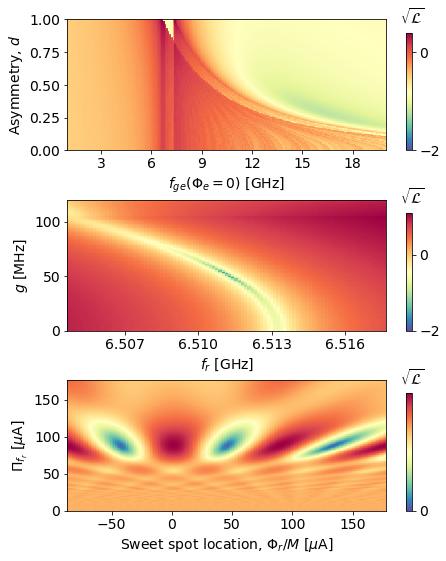

In [109]:
plt.subplot2grid((3, 1), (0, 0), rowspan=1, colspan=1)

m1 = plt.pcolor(freqs/1e9, ds, log10(sqrt(Lfq_d/len(ao._res_points))/1e6), cmap="Spectral_r", vmin=-2, rasterized=True)
ax1 = gca()


plt.xlabel("$f_{ge} (\Phi_e = 0)$ [GHz]")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=3))

plt.ylabel("Asymmetry, $d$")

# plt.text(3.425, 1.05, "(a)", fontdict={"name":"STIX"}, fontsize=22)





plt.subplot2grid((3, 1), (1, 0), rowspan=1, colspan=1)

m2 = plt.pcolor(frs/1e9, gs/1e6, log10(sqrt(Lfr_g/len(ao._res_points))/1e6), 
                      vmin=-2, rasterized=True, cmap="Spectral_r")


plt.xlabel("$f_r$ [GHz]")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=0.003))

plt.ylabel("$g$ [MHz]")

ax2 = gca()

# plt.text(6.4912, 120, "(b)", fontdict={"name":"STIX"}, fontsize=22)





plt.subplot2grid((3, 1), (2, 0), rowspan=1, colspan=1)

m3 = plt.pcolor(swss/1e-6, periods/1e-6, (sqrt(Lp_sws/len(ao._res_points))/1e6), 
                      vmin=0, rasterized=True, cmap="Spectral_r")


# plt.gca().xaxis.set_major_formatter(ticker.EngFormatter("A"))
plt.xlabel("Sweet spot location, $\Phi_r/M$ [$\mu$A]")

# plt.gca().yaxis.set_major_formatter(ticker.EngFormatter("A"))
plt.ylabel("$\Pi_{f_r}$ [$\mu$A]")


# plt.text(-207, 170, "(c)", fontdict={"name":"STIX"}, fontsize=22)


plt.tight_layout(h_pad=-2)

cb = plt.colorbar(m1, ax=ax1, shrink=0.9, use_gridspec = False, anchor=(0,0))
cb.ax.set_title("$\sqrt{\mathcal{L}}$", position=(1,1.025), fontsize=15)
loc = ticker.MultipleLocator(base=2) # this locator puts ticks at regular intervals
cb.locator = loc
cb.update_ticks()


cb = plt.colorbar(m2, ax = ax2, shrink=0.9, use_gridspec = False, anchor=(0,0))
cb.ax.set_title("$\sqrt{\mathcal{L}}$", position=(1,1.025), fontsize=15)
loc = ticker.MultipleLocator(base=2) # this locator puts ticks at regular intervals
cb.locator = loc
cb.update_ticks()

cb = plt.colorbar(m3, shrink=0.9, use_gridspec = False, anchor=(0,0))
cb.ax.set_title("$\sqrt{\mathcal{L}}$", position=(1,1.025), fontsize=15)
loc = ticker.MultipleLocator(base=1) # this locator puts ticks at regular intervals
cb.locator = loc
cb.update_ticks()

gcf().set_size_inches(7,10)
# plt.savefig("../Pictures/loss.pdf", bbox_inches="tight", dpi=600)

/home/gleb/py36/lib/python3.6/site-packages/matplotlib/backends/backend_pdf.py:1201: UserWarning: 'STIX-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  warnings.warn(msg % os.path.basename(filename))


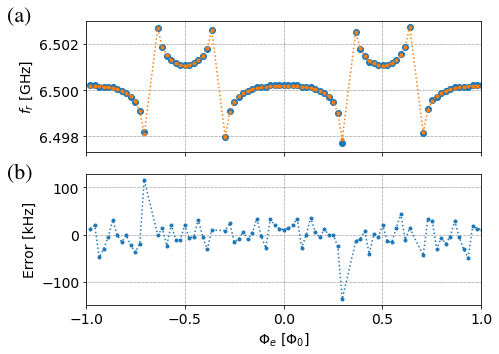

In [159]:
plt.subplot2grid((2, 1), (0, 0), rowspan=1, colspan=1)

x = (ao._res_points[:,0]-result[0][3])/result[0][2]

plot(x, ao._res_points[:,1]/1e9, marker="o", linestyle="", label="Extracted");
plot(x, ao._model_fast(ao._res_points[:,0], ao._opt_params)/1e9, marker=".", linestyle=":")

plt.xlim(-1,1)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=0.5))
plt.gca().set_xticklabels([])

plt.ylabel("$f_r$ [GHz]")

plt.text(-1.4, 6.503, "(a)", fontdict={"name":"STIX"}, fontsize=22)


plt.grid()



plt.subplot2grid((2, 1), (1, 0), rowspan=1, colspan=1)

plot(x, ao._res_points[:,1]/1e3 - ao._model_fast(ao._res_points[:,0], ao._opt_params)/1e3,\
                 marker=".", linestyle=":", label="Extracted");

plt.xlabel("$\Phi_e$ [$\Phi_0$]")
plt.xlim(-1,1)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=0.5))

plt.ylabel("Error [kHz]")

plt.text(-1.4, 120, "(b)", fontdict={"name":"STIX"}, fontsize=22)


plt.grid()
gcf().set_size_inches(7,5)
plt.tight_layout()
plt.savefig("../Pictures/fit.pdf", bbox_inches="tight")

In [1211]:
max(ao._model_fast(ao._res_points[:,0], ao._opt_params)/1e9 - ao._res_points[:,1]/1e9)*1e3

0.0666017916257644

## Noise robustness

In [617]:
sqrt(mean(abs(random.normal(size = 1000000, scale=0.1))**2))

0.10003173915149169

In [619]:
mean(abs(1/sqrt(2)*(random.normal(size = 1000000) +1j*random.normal(size = 1000000)))**2)

1.0014303743265056

In [163]:
with open("Noise_test_01_Nov_18.pkl", "rb") as f:
    results = pickle.load(f)

In [24]:
results = []
for noise in linspace(0, 1e-2, 50):
    tries = []
    for attempt in range(50):
        try:
            print(noise, attempt)
            anti = MeasurementResult.load("BMSTU Clean 3", "I-anticrossing")
            data_dict = anti.get_data()
            data_dict["data"] = data_dict["data"] +\
                    noise*(random.normal(size = data_dict["data"].shape)\
                                    +1j*random.normal(size = data_dict["data"].shape))
            anti.set_data(data_dict)

            ao = AnticrossingOracle("transmon", anti, False, True)
            ao.launch()
            tries.append(ao)
        except Exception as e:
            tries.append(e)
    results.append(tries)

6.5004e+09, 1.8676e+07, 8.7240e-05, -1.4081e-05, 7.9125e+09, 5.3830e-01 loss: 1.09 MHz


In [164]:
params, deviations = [], []
for result in results:
    opt_param_array = array([ao._opt_params for ao in result])
    params.append(mean(opt_param_array, axis=0))
    deviations.append(std(opt_param_array, axis=0))
params = array(params)
deviations = array(deviations)
params[:,0] = params[:,0] - mean(ao._res_points[:,1]) 
params_normed = params/params[0]
deviations_normed = deviations/params[0]

In [44]:
for result in results:
    for ao in result:
        ao._logger = None

In [167]:
port = notch_port(freqs, S21s[0,:])
a = port.do_calibration(freqs, S21s[0,:])[1]
port.autofit()
r = port.fitresults["Ql"]/port.fitresults["absQc"]*a/2

/home/gleb/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


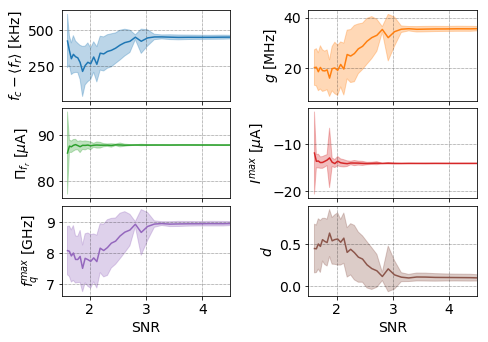

In [176]:
noises = linspace(0, 1e-2, 50)*sqrt(2)
snrs = r/noises

names = [r"$f_c - \langle f_r \rangle $", "$g$", "$\Pi_{f_r}$", "$I^{max}$", "$f_q^{max}$", "$d$"]
factors = [1e3, 1e6, 1e-6, 1e-6, 1e9, 1]
units = ["[kHz]", "[MHz]", "[$\mu$A]", "[$\mu$A]", "[GHz]", ""]

for idx, name in enumerate(names):
    
    plt.subplot2grid((3, 2), (idx//2,idx%2))
    plt.plot((snrs), params[:,idx]/factors[idx], "C"+str(idx))
    plt.fill_between((snrs), params[:,idx]/factors[idx] - deviations[:,idx]/factors[idx],  
                     params[:,idx]/factors[idx] + deviations[:,idx]/factors[idx], alpha=0.3, color="C"+str(idx)) 
    xlim(1.5,4.5)
    if idx not in [4,5]:
        plt.gca().set_xticklabels([])
    else:
        plt.xlabel("SNR")

    plt.ylabel(names[idx]+" "+units[idx], fontsize=14)
    
    plt.grid()
# plt.errorbar((snrs), params_normed[:,5], deviations_normed[:,5])
# plt.fill_between((snrs), params_normed[:,5] - deviations_normed[:,5],  
#                  params_normed[:,5] + deviations_normed[:,5], alpha=0.3)  
plt.xlabel("SNR")
plt.gcf().set_size_inches(7,5)
plt.tight_layout(h_pad=-.1)
# plt.xscale("log")
# plt.yscale("log")
plt.savefig("../Pictures/noise_test.pdf")

array([[ 0.00616752,  0.04314826],
       [ 0.0052158 ,  0.0418445 ],
       [ 0.00758041,  0.04361786],
       ...,
       [-0.0021863 ,  0.03538065],
       [-0.00193828,  0.03592378],
       [-0.00212687,  0.03698771]])

In [247]:
(mean(real(S21s[::1].T), axis=1))

101

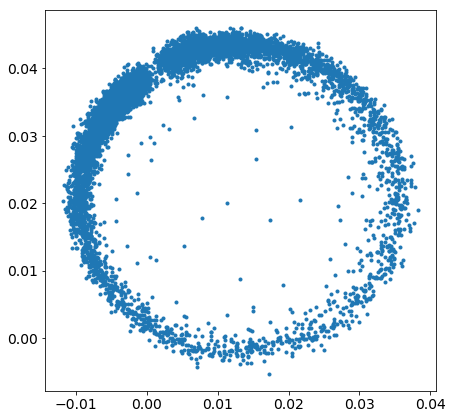

In [166]:
currents, S21s, freqs = anti.get_data().values()
S21s = S21s*exp(2j*pi*65e-9*freqs)

# plot(unwrap(angle(S21s[:45:15].T)))
# plot(real(S21s[::1].T), imag(S21s[::1].T), "o")
scattered = array(list(zip(real(S21s[::1].T).ravel(), imag(S21s[::1].T).ravel())))
plot(scattered[:,0], scattered[:,1], ".")

plt.gcf().set_size_inches(7,7)

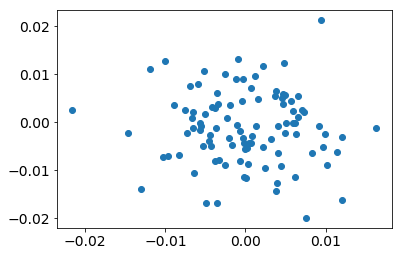

In [643]:
plot(real(noise), imag(noise), "o")

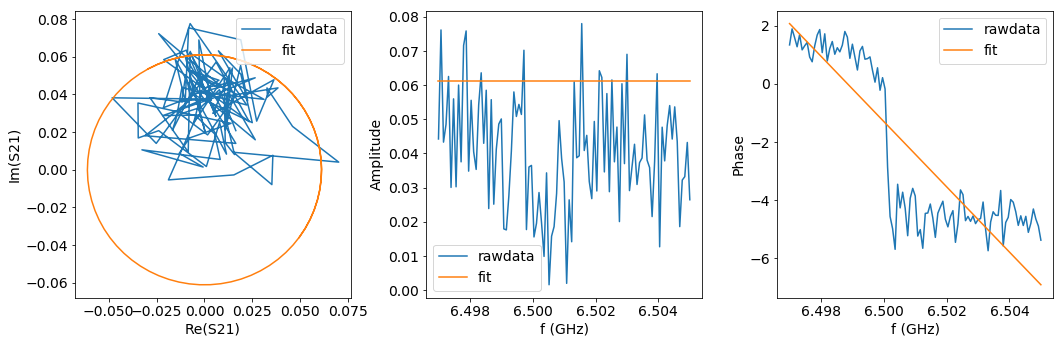

In [663]:
noise = 0.02*1/sqrt(2)*(random.normal(size = S21s[0,:].shape)+1j*random.normal(size = S21s[0,:].shape))
port = notch_port(freqs, S21s[0,:]+noise)
a = port.do_calibration(freqs, S21s[0,:])[1]
port.autofit()
port.fitresults["Ql"]/port.fitresults["absQc"]*a
port.plotall()

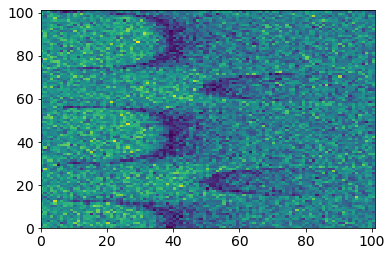

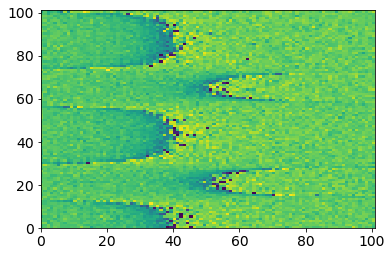

In [672]:
noise = 0.01*(random.normal(size = S21s.shape)+1j*random.normal(size = S21s.shape))
pcolormesh(abs(S21s+noise))
figure()
pcolormesh(angle(S21s+noise))

(4.1059843712498193e-10,
 0.03956570188547761,
 -0.5123904752370422,
 6499918975.960257,
 7914.6468606094795,
 0,
 6499910890.332149)

In [402]:
sqrt(sum(abs(port.z_data_raw - port.z_data_sim)**2/len(port.z_data)))

0.0011818901964914153

0.04243478771654075

In [273]:
from sklearn.cluster import k_means
from sklearn import f

In [295]:
centroids, c = k_means(scattered, 50)[:2]

In [688]:
# plt.scatter(scattered[:,0], scattered[:,1], c=c)
# notch_port(freqs, (centroids[:,0], centroids[:,1])

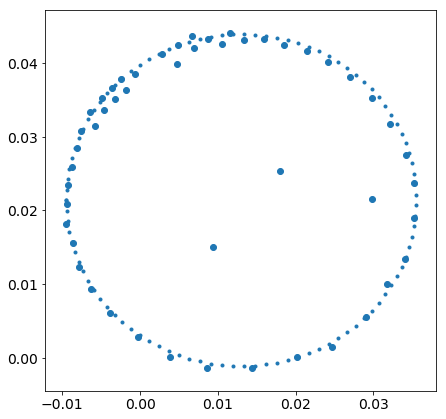

In [389]:
phis = linspace(-pi, pi, 100)
opt_xc, opt_yc, opt_R = 0.013,0.0214,.0225
Xmodel, Ymodel = opt_xc+opt_R*cos(phis), opt_yc+opt_R*sin(phis)
plot(Xmodel, Ymodel, ".")
scatter(centroids[:,0], centroids[:,1])
plt.gcf().set_size_inches(7,7)